<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Identifying west nile virus hotspots and its exacerbating factors


# Overview

### Introduction
The West Nile virus (WNV) is the leading cause of mosquito-borne disease in the continental United States. The virus is most commonly spread to people by the bite of an infected mosquito, although it can also spread through organ transplant, blood transfusions and breast milk ([CDC](https://www.cdc.gov/westnile/index.html)).

Most people infected with the WNV do not feel sick. Of those infected, 1 in 5 develop mild symptoms while 1 in 150 develop a serious, sometimes fatal, illness. Nonetheless, it is important to note that there is currently no human vaccine available. As such, the only way to reduce infection in people is by  reducing exposure to the virus ([WHO, 2017](https://www.who.int/news-room/fact-sheets/detail/west-nile-virus)).

### Problem Statement
As an analyst in the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE), you have been tasked to predict when and where different species of mosquitos will test positive for WNV in the City of Chicago. Subsequently, a cost-benefit analysis should be conducted. This should include annual cost projections for various levels of pesticide coverage (cost) and the effect of these various levels of pesticide coverage (benefit).

This will help the City of Chicago and the Chicago Department of Public Health (CDPH) more efficiently and effectively allocate resources towards preventing transmission of this potentially deadly virus. 

### Method
#<\to insert>

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import (
    Ridge,RidgeCV,
    Lasso,LassoCV,
    ElasticNet, ElasticNetCV,
    LinearRegression,
    LogisticRegression,
    LogisticRegressionCV
)
from sklearn.model_selection import(
    cross_val_score,
    train_test_split
)
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures
)

# pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_columns', 50)  # or 1000

In [103]:
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')
weather = pd.read_csv('../data/weather.csv')
spray = pd.read_csv('../data/spray.csv')

In [104]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [105]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


# Contents
- [Cleaning Train Dataset](#Cleaning-Train-Dataset)
- [Cleaning Test Dataset](#Cleaning-Test-Dataset)
- [Cleaning Weather Dataset](#Cleaning-Weather-Dataset)
- [Cleaning Spray Dataset](#Cleaning-Spray-Dataset)

## Cleaning Train & Test Dataset

In [106]:
train.head(5)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [107]:
# convert all to lower case
train.columns = [word.lower() for word in train.columns]

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   address                 10506 non-null  object 
 2   species                 10506 non-null  object 
 3   block                   10506 non-null  int64  
 4   street                  10506 non-null  object 
 5   trap                    10506 non-null  object 
 6   addressnumberandstreet  10506 non-null  object 
 7   latitude                10506 non-null  float64
 8   longitude               10506 non-null  float64
 9   addressaccuracy         10506 non-null  int64  
 10  nummosquitos            10506 non-null  int64  
 11  wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


Check null

In [109]:
# no null values 
train.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
dtype: int64

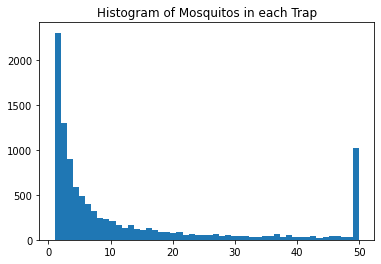

In [110]:
# Distribution of mosquitos found

plt.hist(train['nummosquitos'], bins=50)
plt.title("Histogram of Mosquitos in each Trap");

These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50.

**Assumption**<br/>
If the mosquito traps are only inspected ONCE a day, we will only expect more than one entry for the specific location/trap/date if one of the entry has 50 mosquitos.

In [111]:
# Create a list of columns without 'nummosquitos'

col_w = list(train.columns)
col_w.remove('nummosquitos') # this includes all the column names except for 'nummosquitos'

In [112]:
# Inspect dulplicated rows where number of mosquito count is less than 50

mos_u50 = train.loc[train['nummosquitos']<50,:] # slice data for nummosquitos < 50

dup = mos_u50[col_w].duplicated(keep=False) # find index of data which have same are duplicates except 'nummosquitos'

In [113]:
# View some data which are duplicates except 'nummosquitos'

mos_u50[dup][:6] 

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
280,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
281,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,2,0
294,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,35,0
296,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,8,0


There are entries that have the same date, location, trap with different number of mosquitos.

This means that the data is not entered as we expect. These could be due to data entry errors, traps are checked more than once a day or others. However, it is impossible to discern. We will assume that all datapoints are VALID. (ie. traps are checked several times a day or the like.)

In [114]:
# To merge rows if they have the same date, location, trap
# Create new column to identify those with wnv

col_w.remove('wnvpresent') # col_w includes all columns except wnvpresent and nummosquitos

train_1 = train.groupby(col_w, as_index=False).sum()

# Refresh 'wnvpresent' variable (ie wnvpresent indicates whether the trap has wnv or not)
train_1['wnvcount'] = train_1['wnvpresent']
train_1['wnvpresent'] = train_1['wnvpresent'].map(lambda x: 1 if x > 0 else 0)


In [115]:
# base rate of wnvpresent AFTER transformation

train_1['wnvpresent'].value_counts(normalize=True)

0    0.946077
1    0.053923
Name: wnvpresent, dtype: float64

In [116]:
# Inspect mosquito species and WNY presence

train_1.groupby(['species'])[['nummosquitos', 'wnvpresent']].agg({'nummosquitos': ['sum'],
                                                                'wnvpresent': ['sum', 'mean']})

nummosquitos wnvpresent          
                                sum        sum      mean
species                                                 
CULEX ERRATICUS                   7          0  0.000000
CULEX PIPIENS                 44671        184  0.094359
CULEX PIPIENS/RESTUANS        66268        225  0.058808
CULEX RESTUANS                23431         48  0.020059
CULEX SALINARIUS                145          0  0.000000
CULEX TARSALIS                    7          0  0.000000
CULEX TERRITANS                 510          0  0.000000

Most of the mosquitos found are Culex Pipiens and Culex Restuans which are the only species which were detected to have the West Nile Virus. This is because this two species are more common in the US. Nonetheless, all the species of Culex indicated can potentially transmitt the virus.([CDC](https://www.cdc.gov/westnile/resources/pdfs/MosquitoSpecies1999-2016.pdf))

In [117]:
# Create dataframe which collapse the species column for Visualisation

col_w.remove('species') # ie all columns except wnvpresent, nummosquitos amd species

train_2 = train_1.groupby(col_w, as_index=False).sum()

# Refresh 'wnvpresent' variable (ie if wnvpresent or not)
train_2['wnvpresent'] = train_2['wnvpresent'].map(lambda x: 1 if x > 0 else 0)

In [118]:
train_2['date'] = pd.to_datetime(train_2['date'])
train_2['year'] = train_2['date'].dt.year
train_2['month'] = train_2['date'].dt.month

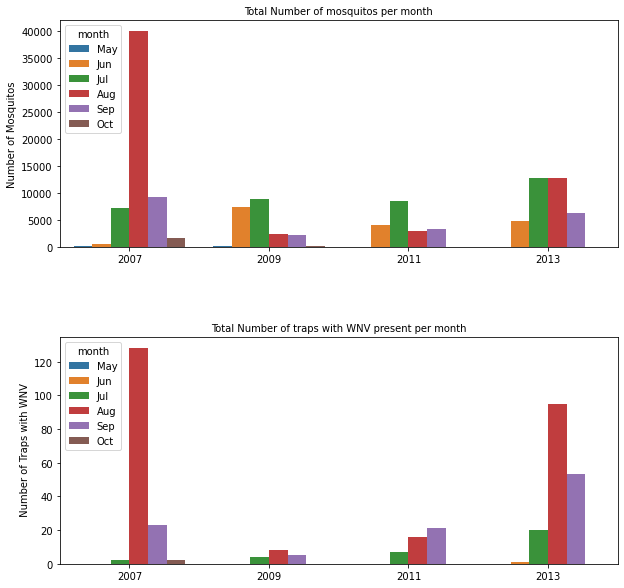

In [119]:
train_plot = train_2.copy()

train_plot = train_plot.groupby(["year", "month"], as_index=False).sum()
train_plot['month'] = train_plot['month'].map({5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct'})

fig, ax = plt.subplots(nrows =2, ncols =1, figsize =(10,10))

sns.barplot(x="year", y="nummosquitos", hue="month", data=train_plot, ax=ax[0])
ax[0].set_title("Total Number of mosquitos per month", fontsize=10)
ax[0].set_xlabel('')
ax[0].set_ylabel("Number of Mosquitos", fontsize=10)

sns.barplot(x="year", y="wnvpresent", hue="month", data=train_plot, ax=ax[1])
ax[1].set_title("Total Number of traps with WNV present per month", fontsize=10)
ax[1].set_xlabel('')
ax[1].set_ylabel(" Number of Traps with WNV", fontsize=10)

plt.subplots_adjust(hspace=0.4)

There seem to be a cyclical trend of number of mosquitos caught in traps across the years. The number of mosquitos appear to pick up in June/July, before declining in seems to be picking up from June to August. 

In [120]:
# Consider including graph that shows wnv present by species
# Mentioned by Sufyan

In [121]:
# Create a dataframe for each year with lat long and the cumulative occurence of virus
# col_w.remove('species')
to_keep = ['date', 'latitude', 'longitude', 'wnvpresent']

train_plot = train_2[to_keep].copy()

train_plot['date'] = pd.to_datetime(train_plot['date']) # convert date type
train_plot['year'] = train_plot['date'].dt.year         # create another column of date
train_plot.drop(columns='date', inplace=True)


train_plot = train_plot.groupby(['year', 'latitude', 'longitude']).sum() # collapse rows that have same values in columns col_w
train_plot.reset_index(inplace=True)    # create new df from those collapsed rows

train_plot.rename(columns={'wnvpresent': 'wnvcount', # Rename column names to the appropriate one
                       }, inplace=True)

train_plot_2007 = train_plot.loc[train_plot['year']==2007, :]
train_plot_2009 = train_plot.loc[train_plot['year']==2009, :]
train_plot_2011 = train_plot.loc[train_plot['year']==2011, :]
train_plot_2013 = train_plot.loc[train_plot['year']==2013, :]

Text(0.5, 1.0, 'Traps with WNV - 2013')

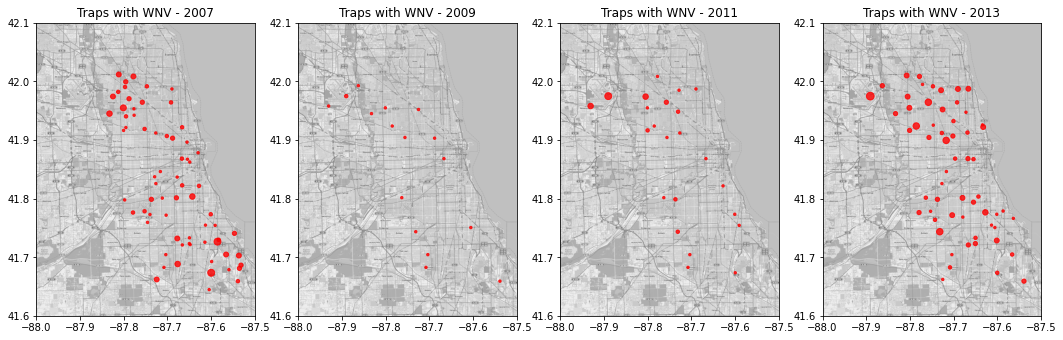

In [122]:
mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)


# Plot for 2007
fig,ax = plt.subplots(figsize=(18,18), nrows=1, ncols=4)
ax[0].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2007 = train_plot_2007.loc[:, ['longitude', 'latitude']]

ax[0].scatter(locations_2007['longitude'], locations_2007['latitude'],
            s=train_plot_2007.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[0].set_title('Traps with WNV - 2007')


# Plot for 2009
ax[1].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2009 = train_plot_2009.loc[:, ['longitude', 'latitude']]

ax[1].scatter(locations_2009['longitude'], locations_2009['latitude'],
            s=train_plot_2009.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[1].set_title('Traps with WNV - 2009')

# Plot for 2011
ax[2].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2011 = train_plot_2011.loc[:, ['longitude', 'latitude']]

ax[2].scatter(locations_2011['longitude'], locations_2011['latitude'],
            s=train_plot_2011.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[2].set_title('Traps with WNV - 2011')

# Plot for 2013
ax[3].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2013 = train_plot_2013.loc[:, ['longitude', 'latitude']]

ax[3].scatter(locations_2013['longitude'], locations_2013['latitude'],
            s=train_plot_2013.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[3].set_title('Traps with WNV - 2013')

In [123]:
train_plot_2007_top = train_plot_2007.sort_values('wnvcount', ascending=False)[:5]
train_plot_2009_top = train_plot_2009.sort_values('wnvcount', ascending=False)[:5]
train_plot_2011_top = train_plot_2011.sort_values('wnvcount', ascending=False)[:5]
train_plot_2013_top = train_plot_2013.sort_values('wnvcount', ascending=False)[:5]

Text(0.5, 1.0, 'Traps with WNV - 2013')

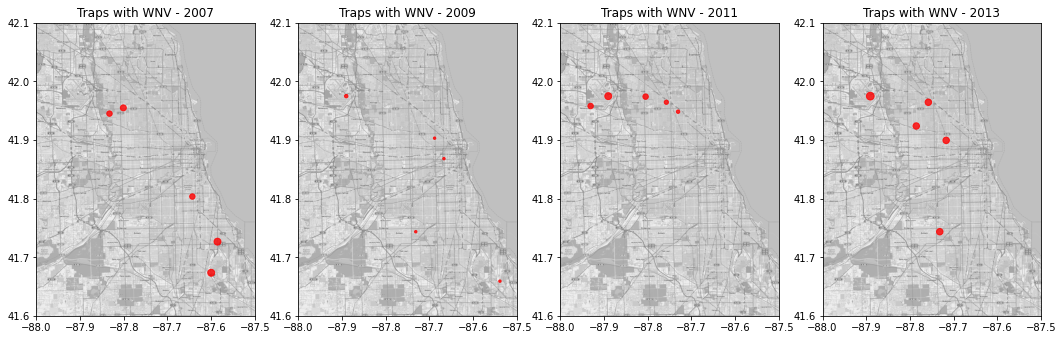

In [124]:
# Plot for 2007
fig,ax = plt.subplots(figsize=(18,18), nrows=1, ncols=4)
ax[0].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2007 = train_plot_2007_top.loc[:, ['longitude', 'latitude']]

ax[0].scatter(locations_2007['longitude'], locations_2007['latitude'],
            s=train_plot_2007_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[0].set_title('Traps with WNV - 2007')


# Plot for 2009
ax[1].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2009 = train_plot_2009_top.loc[:, ['longitude', 'latitude']]

ax[1].scatter(locations_2009['longitude'], locations_2009['latitude'],
            s=train_plot_2009_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[1].set_title('Traps with WNV - 2009')

# Plot for 2011
ax[2].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2011 = train_plot_2011_top.loc[:, ['longitude', 'latitude']]

ax[2].scatter(locations_2011['longitude'], locations_2011['latitude'],
            s=train_plot_2011_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[2].set_title('Traps with WNV - 2011')

# Plot for 2013
ax[3].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2013 = train_plot_2013_top.loc[:, ['longitude', 'latitude']]

ax[3].scatter(locations_2013['longitude'], locations_2013['latitude'],
            s=train_plot_2013_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[3].set_title('Traps with WNV - 2013')

Top 5 highest mosquito counts coming from these 5 locations. 

In [125]:
# Find out the distribution of intervals between trap findings

m_dates = train_2[['date', 'trap', 'year']].sort_values(['trap', 'date']).drop_duplicates(ignore_index=True)

d_liz = []
for i, v in enumerate(m_dates['date']):                 # for loop to get the day intervals between trap checks
    if i == 0:
        d_liz.append(v-v)
    else:
        d_liz.append(v-m_dates['date'][i-1])


m_dates['diff']= d_liz 
m_dates['diff_n'] = m_dates['diff'].dt.days            # save day intervals to integer
m_dates_rmfirst = m_dates[m_dates.duplicated(subset=['trap', 'year'], keep='first')] # remove first trap recorded in the year


,diff_n
count,4273.000000
mean,8.128481
std,4.908871
min,1.000000
25%,6.000000
50%,7.000000
75%,9.000000
max,76.000000


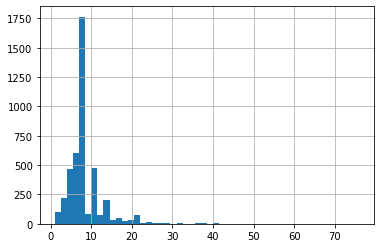

In [126]:
# plot the distribution of intervals between trap checks

m_dates_rmfirst.loc[:, 'diff_n'].hist(bins=50)
m_dates_rmfirst[['diff_n']].describe()

As records are only provided for positive mosquito counts, we are unable to conclude if the intervals represent the frequency of trap checks. Nonetheless, it reflects the data available does not come in regular intervals.

In [127]:
# Select rows required for analysis in train and test set

# train data
train_to_save = train_1[['date', 'species', 'latitude', 'longitude', 'nummosquitos', 'wnvpresent', 'wnvcount']]

# test data
test.columns = [word.lower() for word in test.columns]
test_to_save = test[['date', 'species', 'latitude', 'longitude']]


### Save cleaned train and test data to csv

In [128]:
# Save cleaned data to csv

train_to_save.to_csv(r'../data/train_clean.csv', index = False) # combine rows where date/location/trap is the same
                                                          # nummosquitos are summed
                                                          # wnvpresent = 1 if wnvpresent >0

test_to_save.to_csv(r'../data/test_clean.csv', index = False)

## Cleaning Weather Dataset

weather.head(10)

In [129]:
# convert all to lower case
weather.columns = [word.lower() for word in weather.columns]

In [130]:
# convert date time 
weather['date'] = weather['date'].map(lambda date: datetime.strptime(date, '%Y-%m-%d'))

In [131]:
# create month column 
weather['month'] = weather['date'].dt.month

In [132]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   object        
 5   depart       2944 non-null   object        
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2944 non-null   object        
 8   heat         2944 non-null   object        
 9   cool         2944 non-null   object        
 10  sunrise      2944 non-null   object        
 11  sunset       2944 non-null   object        
 12  codesum      2944 non-null   object        
 13  depth        2944 non-null   object        
 14  water1       2944 non-null   object        
 15  snowfall     2944 non-null   object        
 16  precip

In [133]:
print(f'Total rows for weather: {weather.shape[0]}\n')
for col in weather.columns:
    if 'M' in weather[col].unique().tolist():
        count = weather[col].value_counts()['M']
        print(f'Column {col} has {count} number of "M"');

Total rows for weather: 2944

Column tavg has 11 number of "M"
Column depart has 1472 number of "M"
Column wetbulb has 4 number of "M"
Column heat has 11 number of "M"
Column cool has 11 number of "M"
Column depth has 1472 number of "M"
Column water1 has 2944 number of "M"
Column snowfall has 1472 number of "M"
Column preciptotal has 2 number of "M"
Column stnpressure has 4 number of "M"
Column sealevel has 9 number of "M"
Column avgspeed has 3 number of "M"


### Approach to handle missing data

- `water1` need to drop as majority are missing values 
- `depart, depth, snowfall` have quite alot of missing values as well, need to see what are the unique values and its distribution to judge if it is usefull. 
- the `rest` will need to do imputation 

In [134]:
# drop water1 rows since majority is M  
weather.drop(columns='water1', inplace = True)

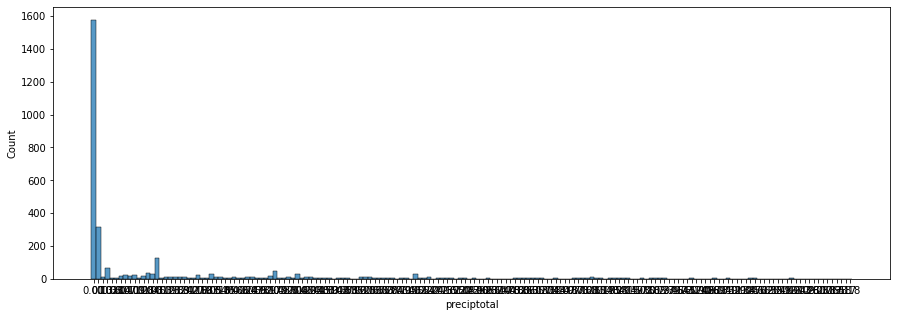

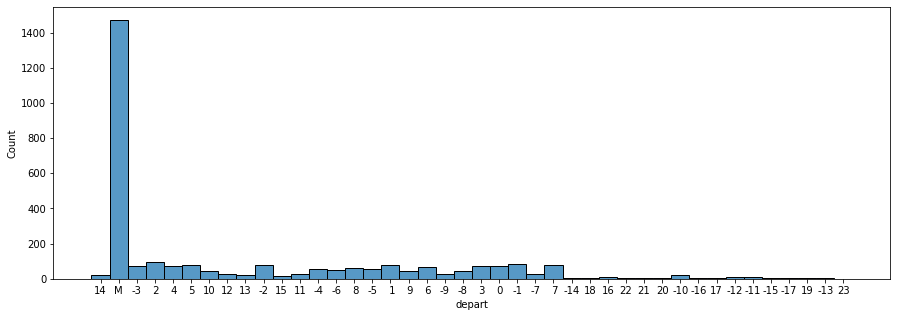

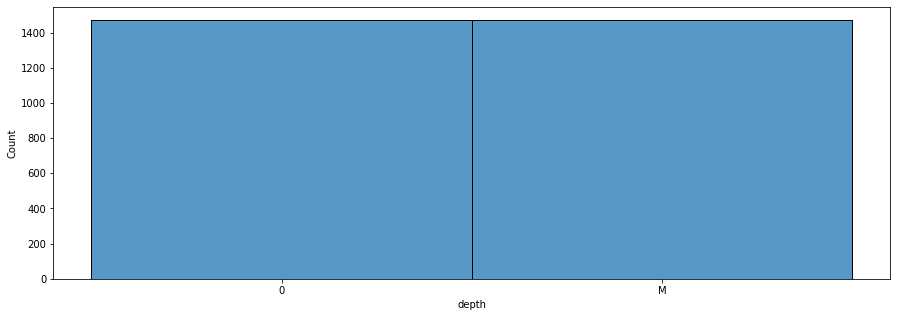

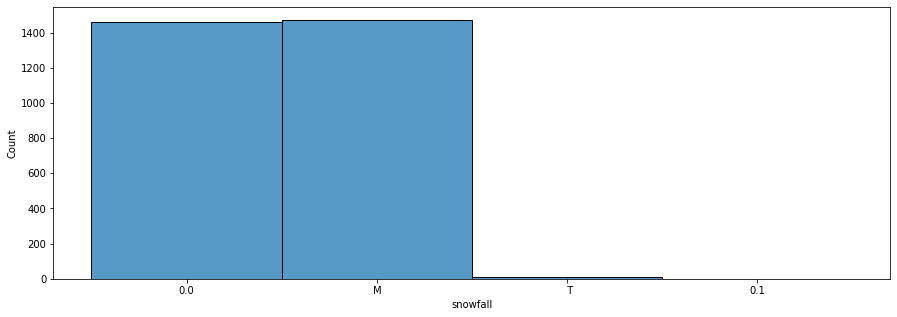

In [135]:
for col in ['preciptotal','depart','depth', 'snowfall']:
    plt.figure(figsize=(15,5))
    sns.histplot(x = col, data = weather)

Need to drop snowfall and depth since not much information to impute. 

Noticed there are `trace` amounts in snowfall and precipitation

In [136]:
weather[weather.snowfall == '  T']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month
558,1,2008-08-04,87,70,79,6,68,70,0,14,0448,1908,TS TSRA RA BR,0,T,2.43,29.18,29.90,3.1,18,9.0,8
724,1,2008-10-26,56,37,47,-1,32,41,18,0,0617,1654,RA,0,T,T,29.10,29.80,17.2,27,17.8,10
726,1,2008-10-27,47,33,40,-8,27,35,25,0,0618,1653,,0,T,T,29.51,30.20,13.7,31,14.4,10
1072,1,2009-10-16,45,39,42,-10,36,39,23,0,0605,1709,RA,0,T,0.04,29.41,30.13,8.2,35,8.2,10
1514,1,2011-05-22,87,61,74,13,60,64,0,9,0425,1911,TSRA RA BR,0,T,0.58,28.95,29.70,10.3,19,11.4,5
1550,1,2011-06-09,69,50,60,-6,52,55,5,0,0416,1925,TSRA RA BR,0,T,0.93,29.28,30.00,8.0,4,12.5,6
1844,1,2012-05-03,86,66,76,22,65,69,0,11,0446,1851,TS TSRA,0,T,1.34,29.16,29.86,10.8,21,12.0,5
2310,1,2013-06-21,82,68,75,5,65,68,0,10,0416,1930,RA BR,0,T,0.79,29.34,30.04,7.4,19,9.5,6
2322,1,2013-06-27,90,64,77,6,67,70,0,12,0418,1931,BR,0,T,0.92,29.01,29.73,7.2,29,7.2,6
2556,1,2013-10-22,42,29,36,-14,31,34,29,0,0612,1660,RA,0,T,T,29.21,29.95,5.4,26,6.1,10


Snowfall has intermittent traces, hence might but be usefull as it might not hypothetically stack into bigger than 'trace' amounts

In [137]:
# Dropping unnecessary columns.

cols_to_drop = ['depart', 'depth', 'snowfall']
weather.drop(columns=cols_to_drop, inplace=True)

In [138]:
weather[weather.preciptotal == '  T'].head(20)

,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month
6,1,2007-05-04,66,49,58,41,50,7,0,0444,1852,RA,T,29.31,30.05,10.4,8,10.8,5
8,1,2007-05-05,66,53,60,38,49,5,0,0443,1853,,T,29.40,30.10,11.7,7,12.0,5
9,2,2007-05-05,66,54,60,39,50,5,0,-,-,,T,29.46,30.09,11.2,7,11.5,5
12,1,2007-05-07,83,47,65,41,54,0,0,0441,1856,RA,T,29.38,30.12,8.6,18,10.5,5
15,2,2007-05-08,80,60,70,57,63,0,5,-,-,HZ,T,29.36,30.02,2.5,8,5.4,5
47,2,2007-05-24,88,66,77,53,63,0,12,-,-,RA HZ,T,29.47,30.10,13.8,20,15.2,5
48,1,2007-05-25,70,56,63,44,53,2,0,0423,1914,,T,29.51,30.24,4.9,5,8.8,5
54,1,2007-05-28,79,50,65,47,56,0,0,0421,1916,RA,T,29.43,30.15,4.8,10,5.3,5
65,2,2007-06-02,81,68,75,62,67,0,10,-,-,RA BR,T,29.10,29.76,7.5,21,8.2,6
73,2,2007-06-06,73,48,61,47,55,4,0,-,-,RA,T,29.13,29.82,9.6,15,10.6,6


Found that trace amounts seems to be more frequent across datetime. 

In [139]:
weather[(weather['date'] < '2007-07-01') & (weather['date'] > '2007-06-01')].head(35)

,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month
64,1,2007-06-02,81,65,73,63,67,0,8,0419,1920,RA BR,0.04,29.03,29.77,6.5,22,7.4,6
65,2,2007-06-02,81,68,75,62,67,0,10,-,-,RA BR,T,29.10,29.76,7.5,21,8.2,6
66,1,2007-06-03,78,62,70,60,63,0,5,0418,1921,TSRA RA BR HZ,0.01,28.82,29.56,5.2,25,6.7,6
67,2,2007-06-03,77,64,71,60,64,0,6,-,-,RA BR HZ VCTS,0.32,28.87,29.54,4.9,24,7.2,6
68,1,2007-06-04,71,58,65,58,60,0,0,0418,1922,TSRA RA BR,0.39,28.82,29.52,7.8,31,9.7,6
69,2,2007-06-04,72,56,64,57,60,1,0,-,-,RA BR,0.31,28.88,29.51,7.9,30,10.1,6
70,1,2007-06-05,64,47,56,48,51,9,0,0417,1923,RA BR,0.42,29.10,29.79,5.2,5,7.6,6
71,2,2007-06-05,63,51,57,47,52,8,0,-,-,RA BR,0.27,29.16,29.78,6.2,3,8.1,6
72,1,2007-06-06,71,44,58,48,55,7,0,0417,1923,RA,0.01,29.07,29.81,10.8,17,11.4,6
73,2,2007-06-06,73,48,61,47,55,4,0,-,-,RA,T,29.13,29.82,9.6,15,10.6,6


In [140]:
weather[weather.preciptotal == '  T'].shape

(318, 19)

Precipitation trace amounts seems to be a value more than zero and less than a certain conventional number based on the geographical area measured. We can see gradual precipitation levels converging to what we call `trace` amounts. As per ([ChicagoTribune, 2018](https://www.chicagotribune.com/weather/ct-wea-asktom-0415-20180413-column.html)), precipitation (and the water content of frozen precipitation like snow) is measured in hundredths (0.01) of an inch. "Trace" amounts are defined as less than half of precipitation 0.01 inch (0.005 inches). Hence we will `impute 0.005` for trace amounts as there are considerable rows of trace amounts 

In [141]:
# Replacing 'T's and 'M's with 0s in some columns.

weather.preciptotal.replace(['M'], 0, inplace=True)
weather.preciptotal.replace(['  T'], 0, inplace=True)
weather.wetbulb.replace(['M'], 0, inplace=True)
weather.heat.replace(['M'], 0, inplace=True)
weather.cool.replace(['M'], 0, inplace=True)
weather.stnpressure.replace(['M'], 0, inplace=True)
weather.sealevel.replace(['M'], 0, inplace=True)
weather.avgspeed.replace(['M'], 0, inplace=True)

In [142]:
# Calculate Tavg using (Tmax + Tmin)/2 to deal with 'M's in Tavg.

weather['tavg'] = (weather.tmax + weather.tmin)/2

In [143]:
# Changing column dtypes from type object to type float.

weather.preciptotal = weather.preciptotal.astype(float)
weather.wetbulb = weather.wetbulb.astype(float)
weather.heat = weather.heat.astype(float)
weather.cool = weather.cool.astype(float)
weather.stnpressure = weather.stnpressure.astype(float)
weather.sealevel = weather.sealevel.astype(float)
weather.avgspeed = weather.avgspeed.astype(float)

In [144]:
weather.describe()

,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,66.988281,53.457880,59.230299,3.394361,5.626019,0.131240,29.244640,29.876515,6.960666,17.494905,8.571705,7.500000
std,0.500085,11.461970,10.381939,10.533668,10.675181,9.534205,5.945704,6.103403,0.393208,1.090459,1.662266,3.587527,10.063609,3.157590,1.710236
min,1.000000,41.000000,29.000000,35.500000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,0.000000,5.000000
25%,1.000000,69.000000,50.000000,60.000000,46.000000,53.000000,0.000000,0.000000,0.000000,29.190000,29.870000,4.300000,7.000000,6.300000,6.000000
50%,1.500000,78.000000,59.000000,68.500000,54.000000,61.000000,0.000000,4.000000,0.000000,29.280000,29.970000,6.400000,19.000000,8.100000,7.500000
75%,2.000000,85.000000,66.000000,75.000000,62.000000,67.000000,5.000000,10.000000,0.060000,29.390000,30.060000,9.200000,25.000000,10.400000,9.000000
max,2.000000,104.000000,83.000000,93.500000,75.000000,78.000000,29.000000,29.000000,6.860000,29.860000,30.530000,24.100000,36.000000,26.300000,10.000000


In [145]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   float64       
 5   dewpoint     2944 non-null   int64         
 6   wetbulb      2944 non-null   float64       
 7   heat         2944 non-null   float64       
 8   cool         2944 non-null   float64       
 9   sunrise      2944 non-null   object        
 10  sunset       2944 non-null   object        
 11  codesum      2944 non-null   object        
 12  preciptotal  2944 non-null   float64       
 13  stnpressure  2944 non-null   float64       
 14  sealevel     2944 non-null   float64       
 15  resultspeed  2944 non-null   float64       
 16  result

In [146]:
weather.sunrise.unique()

array(['0448', '-', '0447', '0446', '0444', '0443', '0442', '0441',
       '0439', '0438', '0437', '0436', '0435', '0434', '0433', '0432',
       '0431', '0430', '0429', '0428', '0427', '0426', '0425', '0424',
       '0423', '0422', '0421', '0420', '0419', '0418', '0417', '0416',
       '0440', '0445', '0449', '0450', '0451', '0452', '0453', '0454',
       '0455', '0456', '0457', '0458', '0459', '0500', '0501', '0502',
       '0503', '0504', '0505', '0506', '0508', '0509', '0510', '0511',
       '0512', '0513', '0514', '0515', '0516', '0517', '0518', '0519',
       '0520', '0521', '0522', '0523', '0524', '0525', '0526', '0527',
       '0528', '0529', '0530', '0531', '0532', '0533', '0535', '0536',
       '0537', '0538', '0539', '0540', '0541', '0542', '0543', '0544',
       '0545', '0546', '0547', '0548', '0549', '0550', '0552', '0553',
       '0554', '0555', '0556', '0557', '0558', '0559', '0600', '0602',
       '0603', '0604', '0605', '0606', '0607', '0608', '0610', '0611',
       '0

In [147]:
weather.sunset.unique()

array(['1849', '-', '1850', '1851', '1852', '1853', '1855', '1856',
       '1857', '1858', '1859', '1860', '1901', '1902', '1903', '1904',
       '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912',
       '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920',
       '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928',
       '1929', '1930', '1931', '1900', '1854', '1848', '1846', '1845',
       '1843', '1842', '1840', '1839', '1837', '1835', '1834', '1832',
       '1831', '1829', '1827', '1826', '1824', '1822', '1821', '1819',
       '1817', '1815', '1814', '1812', '1810', '1809', '1807', '1805',
       '1803', '1760', '1758', '1756', '1755', '1753', '1751', '1749',
       '1748', '1746', '1744', '1742', '1741', '1739', '1737', '1735',
       '1734', '1732', '1730', '1729', '1727', '1725', '1724', '1722',
       '1720', '1719', '1717', '1715', '1714', '1712', '1711', '1709',
       '1707', '1706', '1704', '1703', '1701', '1660', '1658', '1657',
       '1

Need to normalize 24h format to float 

In [148]:
weather.head()

,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month
0,1,2007-05-01,83,50,66.5,51,56.0,0.0,2.0,0448,1849,,0.0,29.10,29.82,1.7,27,9.2,5
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,-,-,,0.0,29.18,29.82,2.7,25,9.6,5
2,1,2007-05-02,59,42,50.5,42,47.0,14.0,0.0,0447,1850,BR,0.0,29.38,30.09,13.0,4,13.4,5
3,2,2007-05-02,60,43,51.5,42,47.0,13.0,0.0,-,-,BR HZ,0.0,29.44,30.08,13.3,2,13.4,5
4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,0446,1851,,0.0,29.39,30.12,11.7,7,11.9,5


In [149]:
# find how many unique timings from station 2
weather[weather.station == 2].sunrise.unique()

array(['-'], dtype=object)

Weather station 2 does not have sunrise and sunset. Assuming about the same we will impute same sunrise and sunset timings into station 2 similar to station 1

In [150]:
# create reference to get sunrise and sunset timings from station 1 
weather_ref = weather[weather.station == 1][['date','sunrise','sunset']]

In [151]:
# imput all sunrise and sunset timings for station 2 similar to station 1 based on 'date'

weather = weather.merge(weather_ref, on = 'date').drop(columns = ['sunrise_x', 'sunset_x']).rename(columns = {'sunrise_y': 'sunrise', 'sunset_y': 'sunset'})

In [152]:
# Define function to help convert 24h to float (0430 -->> 4.5)

def suntime_float(sun_time):
  
  # Getting the hour part of the time to convert to the whole number part in the float number.
  hours = sun_time // 100

  # Getting the minute part of the time to convert to the decimal part in the float number.
  minutes = (sun_time % 100) / 60

  return hours + minutes

merge with weather_data_com

In [153]:
# Creating series of sunrise and sunset times and converting them to dtype float.
sunrise_times = weather['sunrise'].astype(float)
sunset_times = weather['sunset'].astype(float)

# Mapping the above created function to convert 24h time values to floating point numbers.
weather['sunrise'] = list(sunrise_times.map(suntime_float))
weather['sunset'] = list(sunset_times.map(suntime_float))

In [154]:
weather

,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,sunrise,sunset
0,1,2007-05-01,83,50,66.5,51,56.0,0.0,2.0,,0.00,29.10,29.82,1.7,27,9.2,5,4.800000,18.816667
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,,0.00,29.18,29.82,2.7,25,9.6,5,4.800000,18.816667
2,1,2007-05-02,59,42,50.5,42,47.0,14.0,0.0,BR,0.00,29.38,30.09,13.0,4,13.4,5,4.783333,18.833333
3,2,2007-05-02,60,43,51.5,42,47.0,13.0,0.0,BR HZ,0.00,29.44,30.08,13.3,2,13.4,5,4.783333,18.833333
4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,,0.00,29.39,30.12,11.7,7,11.9,5,4.766667,18.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,44.5,34,42.0,20.0,0.0,,0.00,29.42,30.07,8.5,29,9.0,10,6.333333,16.833333
2940,1,2014-10-30,51,32,41.5,34,40.0,23.0,0.0,,0.00,29.34,30.09,5.1,24,5.5,10,6.366667,16.816667
2941,2,2014-10-30,53,37,45.0,35,42.0,20.0,0.0,RA,0.00,29.41,30.10,5.9,23,6.5,10,6.366667,16.816667
2942,1,2014-10-31,47,33,40.0,25,33.0,25.0,0.0,RA SN,0.03,29.49,30.20,22.6,34,22.9,10,6.383333,16.783333


Checking code sum should only have these based on Daily Table format given by Kaggle 

`FC` - Tornado

`FC` - Funnel Cloud

`TS` - Thunderstorm

`GR` - Hail

`RA` - Rain


In [155]:
# to do code sum on individual stations
weather_station_1 = weather[weather.station == 1]
weather_station_2 = weather[weather.station == 2]

In [156]:
# Defining a function to clean the weather conditions given in Codesum column.
def clean_codesum(string):
    return " ".join(set(" ".join(string).split(' ')))

In [157]:
codesum_groupedby_date_stn1 = weather_station_1.groupby('date')['codesum'].agg(clean_codesum)
codesum_groupedby_date_stn2 = weather_station_2.groupby('date')['codesum'].agg(clean_codesum)

Merged codesum by date. Now need to vectorize


In [158]:
# define function that creates dummy columns 

def vectorise_code(group):
    cvec = CountVectorizer(analyzer='word', token_pattern=r'[\w\+]+')
    code_sum_cvec = cvec.fit_transform(group)
    code_sum_df = pd.DataFrame(code_sum_cvec.toarray(),weather['date'].unique(), columns=cvec.get_feature_names_out())
    code_sum_df = code_sum_df.reset_index().rename( columns = {'index': 'date'})
    return code_sum_df

In [159]:
# dummify codes in both stations
vect_codesum_stn1 = vectorise_code(codesum_groupedby_date_stn1)
vect_codesum_stn2 = vectorise_code(codesum_groupedby_date_stn2)

# impute station = 1 as reference
vect_codesum_stn1['station'] = 1
vect_codesum_stn2['station'] = 2

# concat both to make same shape as weather df
code_sum_df = pd.concat((vect_codesum_stn1, vect_codesum_stn2), axis=0).fillna(0)

# print out shape
print(code_sum_df.shape)
code_sum_df

(2944, 18)


,date,bcfg,br,dz,fg,fg+,fu,hz,mifg,ra,sn,sq,ts,tsra,vcts,station,gr,vcfg
0,2007-05-01,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0.0,0.0
1,2007-05-02,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0.0,0.0
2,2007-05-03,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0.0,0.0
3,2007-05-04,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,1,0.0,0.0
4,2007-05-05,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,2,0.0,0.0
1468,2014-10-28,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,2,0.0,0.0
1469,2014-10-29,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,2,0.0,0.0
1470,2014-10-30,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,2,0.0,0.0


In [160]:
# check shape 

print(code_sum_df.shape)
print(weather.shape)

(2944, 18)
(2944, 19)


In [161]:
cleaned_weather_df = weather.merge(code_sum_df, on = ['date','station'])
cleaned_weather_df

,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,sunrise,sunset,bcfg,br,dz,fg,fg+,fu,hz,mifg,ra,sn,sq,ts,tsra,vcts,gr,vcfg
0,1,2007-05-01,83,50,66.5,51,56.0,0.0,2.0,,0.00,29.10,29.82,1.7,27,9.2,5,4.800000,18.816667,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,,0.00,29.18,29.82,2.7,25,9.6,5,4.800000,18.816667,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
2,1,2007-05-02,59,42,50.5,42,47.0,14.0,0.0,BR,0.00,29.38,30.09,13.0,4,13.4,5,4.783333,18.833333,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
3,2,2007-05-02,60,43,51.5,42,47.0,13.0,0.0,BR HZ,0.00,29.44,30.08,13.3,2,13.4,5,4.783333,18.833333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0
4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,,0.00,29.39,30.12,11.7,7,11.9,5,4.766667,18.850000,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,44.5,34,42.0,20.0,0.0,,0.00,29.42,30.07,8.5,29,9.0,10,6.333333,16.833333,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
2940,1,2014-10-30,51,32,41.5,34,40.0,23.0,0.0,,0.00,29.34,30.09,5.1,24,5.5,10,6.366667,16.816667,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
2941,2,2014-10-30,53,37,45.0,35,42.0,20.0,0.0,RA,0.00,29.41,30.10,5.9,23,6.5,10,6.366667,16.816667,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0
2942,1,2014-10-31,47,33,40.0,25,33.0,25.0,0.0,RA SN,0.03,29.49,30.20,22.6,34,22.9,10,6.383333,16.783333,0,0,0,0,0,0,0,0.0,1,1,0,0,0,0,0.0,0.0


### Save cleaned weather data to csv

In [162]:
# saving into weather_cleaned
cleaned_weather_df.to_csv(r'../data/weather_cleaned.csv', index = False)

## Cleaning Spray Dataset

In [163]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [164]:
# convert all to lower case
spray.columns = [word.lower() for word in spray.columns]

In [165]:
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [166]:
# Change date column to be datetime dtype
spray['date'] = pd.to_datetime(spray['date']).dt.date

In [167]:
spray['time'] = pd.to_datetime(spray['time'])

In [168]:
# spray.set_index('date' ,inplace = True)
# spray.sort_index(inplace=True)

In [169]:
for date in spray['date'].unique():
    print(date,'Earlist time:', spray[spray['date'] == date]['time'].min().time(),'Latest time:', spray[spray['date'] == date]['time'].max().time())

2011-08-29 Earlist time: 18:56:58 Latest time: 19:15:28
2011-09-07 Earlist time: 19:42:12 Latest time: 21:41:10
2013-07-17 Earlist time: 10:49:04 Latest time: 21:55:27
2013-07-25 Earlist time: 19:58:20 Latest time: 22:37:26
2013-08-08 Earlist time: 20:16:44 Latest time: 22:23:45
2013-08-15 Earlist time: 20:13:56 Latest time: 23:59:58
2013-08-16 Earlist time: 00:00:01 Latest time: 00:24:49
2013-08-22 Earlist time: 20:02:55 Latest time: 23:44:46
2013-08-29 Earlist time: 20:06:39 Latest time: 22:28:57
2013-09-05 Earlist time: 19:27:13 Latest time: 20:40:56


Time range for each of these days has many variations. will not be useful if merging with other dataset. hence need to remove column time. 


In [170]:
spray.drop(columns = 'time', inplace= True)

In [171]:
spray.isnull().sum()

date         0
latitude     0
longitude    0
dtype: int64

In [172]:
spray.shape

(14835, 3)

In [173]:
spray.drop_duplicates(subset = ['date', 'latitude', 'longitude'])

,date,latitude,longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858
...,...,...,...
14830,2013-09-05,42.006587,-87.812355
14831,2013-09-05,42.006192,-87.816015
14832,2013-09-05,42.006022,-87.817392
14833,2013-09-05,42.005453,-87.817423


In [174]:
spray.to_csv(r'../data/spray_cleaned.csv', index = False)

## Merging of all Datasets 

In [175]:
# read csv
train = pd.read_csv('../data/train_clean.csv')
test = pd.read_csv('../data/test_clean.csv')
weather = pd.read_csv('../data/weather_cleaned.csv')
spray = pd.read_csv('../data/spray_cleaned.csv')

### Merging Weather to train/test dataset

In [176]:
test.head()

,date,species,latitude,longitude
0,2008-06-11,CULEX PIPIENS/RESTUANS,41.95469,-87.800991
1,2008-06-11,CULEX RESTUANS,41.95469,-87.800991
2,2008-06-11,CULEX PIPIENS,41.95469,-87.800991
3,2008-06-11,CULEX SALINARIUS,41.95469,-87.800991
4,2008-06-11,CULEX TERRITANS,41.95469,-87.800991


In [177]:
# convert date to datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
weather['date'] = pd.to_datetime(weather['date'])
spray['date'] = pd.to_datetime(spray['date'])



In [178]:
train.head()

,date,species,latitude,longitude,nummosquitos,wnvpresent,wnvcount
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.867108,-87.654224,1,0,0
1,2007-05-29,CULEX RESTUANS,41.867108,-87.654224,2,0,0
2,2007-05-29,CULEX RESTUANS,41.862292,-87.648860,1,0,0
3,2007-05-29,CULEX RESTUANS,41.896282,-87.655232,1,0,0
4,2007-05-29,CULEX RESTUANS,41.907645,-87.760886,1,0,0


In [179]:
test.head()

,date,species,latitude,longitude
0,2008-06-11,CULEX PIPIENS/RESTUANS,41.95469,-87.800991
1,2008-06-11,CULEX RESTUANS,41.95469,-87.800991
2,2008-06-11,CULEX PIPIENS,41.95469,-87.800991
3,2008-06-11,CULEX SALINARIUS,41.95469,-87.800991
4,2008-06-11,CULEX TERRITANS,41.95469,-87.800991


In [180]:
# print out shapes of test and train

print(train.shape)
print(test.shape)
print(f'Expected rows: {train.shape[0] + test.shape[0]}')

(8475, 7)
(116293, 4)
Expected rows: 124768


In [181]:
merge_df = pd.concat([train,test], axis = 0)

In [182]:
print(f'Merged_df rows: {merge_df.shape[0]}')

Merged_df rows: 124768


In [183]:
# To check if all the traps in test are also in train set

train_loc = []
for x, y in zip(train['longitude'], train['latitude']):
    if [x, y] not in train_loc:
        train_loc.append([x, y])
    
test_loc = []
for x, y in zip(test['longitude'], test['latitude']):
    if [x, y] not in test_loc:
        test_loc.append([x, y])
        
ex_loc = []
for i in test_loc:
    if i not in train_loc:
        ex_loc.append(i)

In [184]:
len(ex_loc)

13

There are 13 traps that were not previously set, or were previously empty.

In [185]:
def closest_station(row):
    
    # Accessing the tested mozzie trap's Latitude & Longitude.
    lat = row['latitude']
    lon = row['longitude']
    
    
    # Calculating euclidean distance between the row's location and the spray's location (using values in Latitude and Longitude columns)
    station_1_dist = ((41.995 - lat) ** 2 + (-87.933 - lon) ** 2) ** 0.5
    station_2_dist = ((41.786 - lat) ** 2 + (-87.752 - lon) ** 2) ** 0.5
    # So if the calculated distance is <= distance value given as input, the tested trap is considered sprayed, so return 1.
    if station_2_dist < station_1_dist:
        return 2
    
    # Return 0 (mozzie trap not sprayed) if spray_dist > dist.
    return 1

In [186]:
# Apply function to merge_df to find closest station for all TRAPS
merge_df['station'] = merge_df.apply(closest_station, axis=1)

In [187]:
merge_df.head()

,date,species,latitude,longitude,nummosquitos,wnvpresent,wnvcount,station
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.867108,-87.654224,1.0,0.0,0.0,2
1,2007-05-29,CULEX RESTUANS,41.867108,-87.654224,2.0,0.0,0.0,2
2,2007-05-29,CULEX RESTUANS,41.862292,-87.648860,1.0,0.0,0.0,2
3,2007-05-29,CULEX RESTUANS,41.896282,-87.655232,1.0,0.0,0.0,2
4,2007-05-29,CULEX RESTUANS,41.907645,-87.760886,1.0,0.0,0.0,2


In [188]:
# split merge_df into two portions based on station number 
train_station_1 = merge_df.loc[merge_df['station'] == 1]
train_station_2 = merge_df.loc[merge_df['station'] == 2]

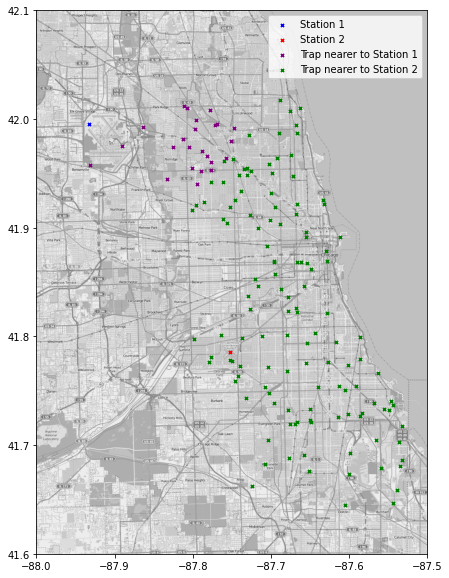

In [189]:
mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
                     
#traps = pd.read_csv('./datasets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(7,10))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect='auto')

plt.scatter(-87.933, 41.995, marker='x', s= 10, c='blue', label='Station 1')
plt.scatter(-87.752, 41.786, marker='x', s= 10, c='red', label='Station 2')


locations = train_station_1[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x', s= 10, c='purple', label='Trap nearer to Station 1');

locations2 = train_station_2[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations2[:,0], locations2[:,1], marker='x', s= 10, c='green', label='Trap nearer to Station 2');
plt.legend();

In [190]:
# print out shapes of test and train

print(train.shape)
print(test.shape)
print(f'Expected rows: {train.shape[0] + test.shape[0]}')

(8475, 7)
(116293, 4)
Expected rows: 124768


In [191]:
merge_df_weather = merge_df.merge(weather, on = ['date','station'], how = 'left')
merge_df_weather

,date,species,latitude,longitude,nummosquitos,wnvpresent,wnvcount,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,sunrise,sunset,bcfg,br,dz,fg,fg+,fu,hz,mifg,ra,sn,sq,ts,tsra,vcts,gr,vcfg
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.867108,-87.654224,1.0,0.0,0.0,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.00,29.44,30.09,5.8,16,7.4,5,4.350000,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0
1,2007-05-29,CULEX RESTUANS,41.867108,-87.654224,2.0,0.0,0.0,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.00,29.44,30.09,5.8,16,7.4,5,4.350000,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0
2,2007-05-29,CULEX RESTUANS,41.862292,-87.648860,1.0,0.0,0.0,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.00,29.44,30.09,5.8,16,7.4,5,4.350000,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0
3,2007-05-29,CULEX RESTUANS,41.896282,-87.655232,1.0,0.0,0.0,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.00,29.44,30.09,5.8,16,7.4,5,4.350000,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0
4,2007-05-29,CULEX RESTUANS,41.907645,-87.760886,1.0,0.0,0.0,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.00,29.44,30.09,5.8,16,7.4,5,4.350000,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124763,2014-10-02,CULEX SALINARIUS,41.925652,-87.633590,NaN,NaN,NaN,2,75,66,70.5,63,65.0,0.0,6.0,TSRA RA BR,0.72,29.10,29.78,7.2,17,7.9,10,5.816667,17.533333,0,1,0,0,0,0,0,0.0,1,0,0,0,1,0,0.0,0.0
124764,2014-10-02,CULEX TERRITANS,41.925652,-87.633590,NaN,NaN,NaN,2,75,66,70.5,63,65.0,0.0,6.0,TSRA RA BR,0.72,29.10,29.78,7.2,17,7.9,10,5.816667,17.533333,0,1,0,0,0,0,0,0.0,1,0,0,0,1,0,0.0,0.0
124765,2014-10-02,CULEX TARSALIS,41.925652,-87.633590,NaN,NaN,NaN,2,75,66,70.5,63,65.0,0.0,6.0,TSRA RA BR,0.72,29.10,29.78,7.2,17,7.9,10,5.816667,17.533333,0,1,0,0,0,0,0,0.0,1,0,0,0,1,0,0.0,0.0
124766,2014-10-02,UNSPECIFIED CULEX,41.925652,-87.633590,NaN,NaN,NaN,2,75,66,70.5,63,65.0,0.0,6.0,TSRA RA BR,0.72,29.10,29.78,7.2,17,7.9,10,5.816667,17.533333,0,1,0,0,0,0,0,0.0,1,0,0,0,1,0,0.0,0.0


### Merging spray data with weather/train/test dataset

In [194]:
spray.head()


,date,latitude,longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


In [195]:
def spray_within_days(row, dist=0.001):
    
    # Accessing the tested mozzie trap's Latitude & Longitude.
    lat = row['latitude']
    lon = row['longitude']
    date = row['date']
    
    spray_filtered = spray[(spray['date'] == date)]
    
    for i in spray_filtered.index:
        
        # Calculating euclidean distance between the row's location and the spray's location (using values in Latitude and Longitude columns)
        spray_dist = ((spray.loc[i, 'latitude'] - lat) ** 2 + (spray.loc[i, 'longitude'] - lon) ** 2) ** 0.5
        
        # So if the calculated distance is <= distance value given as input, the tested trap is considered sprayed, so return 1.
        if spray_dist <= dist:
            return 1
    
    # Return 0 (mozzie trap not sprayed) if spray_dist > dist.
    return 0

In [196]:
merge_weather_spray = merge_df_weather
merge_weather_spray['sprayed'] = merge_df_weather.apply(spray_within_days, axis=1)

KeyboardInterrupt: 

In [ ]:
merge_weather_spray['sprayed'].value_counts()

0    124758
1        10
Name: sprayed, dtype: int64

In [ ]:
merge_weather_spray.sort_values(by = 'nummosquitos', inplace = True)

### Split train/test into csv

In [ ]:
train_merged = merge_weather_spray.iloc[0:8475]
# check no NAN
train_merged.isnull().sum()

date            0
species         0
latitude        0
longitude       0
nummosquitos    0
wnvpresent      0
wnvcount        0
station         0
tmax            0
tmin            0
tavg            0
dewpoint        0
wetbulb         0
heat            0
cool            0
codesum         0
preciptotal     0
stnpressure     0
sealevel        0
resultspeed     0
resultdir       0
avgspeed        0
month           0
sunrise         0
sunset          0
bc              0
br              0
dz              0
fg              0
fg+             0
fu              0
hz              0
mi              0
ra              0
sn              0
sq              0
ts              0
vc              0
gr              0
sprayed         0
dtype: int64

In [ ]:
test_merged = merge_weather_spray.iloc[8475:]
# check no NAN and cross check test original shape
print(f'Sum of null values in nummosquitos: {test_merged.nummosquitos.isnull().sum()}')
print(test.shape)

# check head if there are any values in nummosquitos | wnvcount	| wnvpresent
test_merged.head(3)

Sum of null values in nummosquitos: 116293
(116293, 4)


,date,species,latitude,longitude,nummosquitos,wnvpresent,wnvcount,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,sunrise,sunset,bc,br,dz,fg,fg+,fu,hz,mi,ra,sn,sq,ts,vc,gr,sprayed
8475,2008-06-11,CULEX PIPIENS/RESTUANS,41.95469,-87.800991,NaN,NaN,NaN,1,86,61,73.5,56,64.0,0.0,9.0,,0.0,29.28,29.99,8.9,18,10.0,6,4.266667,19.433333,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0
8476,2008-06-11,CULEX RESTUANS,41.95469,-87.800991,NaN,NaN,NaN,1,86,61,73.5,56,64.0,0.0,9.0,,0.0,29.28,29.99,8.9,18,10.0,6,4.266667,19.433333,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0
8477,2008-06-11,CULEX PIPIENS,41.95469,-87.800991,NaN,NaN,NaN,1,86,61,73.5,56,64.0,0.0,9.0,,0.0,29.28,29.99,8.9,18,10.0,6,4.266667,19.433333,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0


In [ ]:
# drop columns for test_merged_weather set 

test_merged = test_merged.drop(columns = ['nummosquitos','wnvcount', 'wnvpresent'])

In [ ]:
# Save cleaned data to csv

train_merged.to_csv(r'../data/merged_train.csv', index = False) # Combined both weather and spray data
test_merged.to_csv(r'../data/merged_test.csv', index = False) # Combined both weather and spray data

## Further EDA Analysis

In [197]:
# read in merged data

train_merged = pd.read_csv('../data/merged_train.csv')
train_merged['date'] = pd.to_datetime(train_merged['date'])

In [198]:
train_merged.head()

,date,species,latitude,longitude,nummosquitos,wnvpresent,wnvcount,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,sunrise,sunset,bc,br,dz,fg,fg+,fu,hz,mi,ra,sn,sq,ts,vc,gr,sprayed
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.867108,-87.654224,1.0,0.0,0.0,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.00,29.44,30.09,5.8,16,7.4,5,4.350000,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0.0,0
1,2011-06-10,CULEX RESTUANS,41.822536,-87.666343,1.0,0.0,0.0,2,71,51,61.0,56,58.0,4.0,0.0,TS TS RA BR HZ,0.44,29.26,29.92,6.1,1,7.5,6,4.266667,19.433333,0,1,0,0,0,0,1,0.0,1,0,0,1,0,0.0,0
2,2011-06-10,CULEX RESTUANS,41.680946,-87.535198,1.0,0.0,0.0,2,71,51,61.0,56,58.0,4.0,0.0,TS TS RA BR HZ,0.44,29.26,29.92,6.1,1,7.5,6,4.266667,19.433333,0,1,0,0,0,0,1,0.0,1,0,0,1,0,0.0,0
3,2009-10-01,CULEX TERRITANS,41.678618,-87.559308,1.0,0.0,0.0,2,59,44,51.5,46,49.0,13.0,0.0,TS RA RA BR,0.59,29.18,29.90,8.8,13,8.7,10,5.800000,17.566667,0,1,0,0,0,0,0,0.0,1,0,0,1,0,0.0,0
4,2011-06-10,CULEX TERRITANS,41.846075,-87.716277,1.0,0.0,0.0,2,71,51,61.0,56,58.0,4.0,0.0,TS TS RA BR HZ,0.44,29.26,29.92,6.1,1,7.5,6,4.266667,19.433333,0,1,0,0,0,0,1,0.0,1,0,0,1,0,0.0,0


In [199]:
train_merged.columns

Index(['date', 'species', 'latitude', 'longitude', 'nummosquitos',
       'wnvpresent', 'wnvcount', 'station', 'tmax', 'tmin', 'tavg', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'codesum', 'preciptotal', 'stnpressure',
       'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'month', 'sunrise',
       'sunset', 'bc', 'br', 'dz', 'fg', 'fg+', 'fu', 'hz', 'mi', 'ra', 'sn',
       'sq', 'ts', 'vc', 'gr', 'sprayed'],
      dtype='object')

In [200]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          8475 non-null   datetime64[ns]
 1   species       8475 non-null   object        
 2   latitude      8475 non-null   float64       
 3   longitude     8475 non-null   float64       
 4   nummosquitos  8475 non-null   float64       
 5   wnvpresent    8475 non-null   float64       
 6   wnvcount      8475 non-null   float64       
 7   station       8475 non-null   int64         
 8   tmax          8475 non-null   int64         
 9   tmin          8475 non-null   int64         
 10  tavg          8475 non-null   float64       
 11  dewpoint      8475 non-null   int64         
 12  wetbulb       8475 non-null   float64       
 13  heat          8475 non-null   float64       
 14  cool          8475 non-null   float64       
 15  codesum       8475 non-null   object  

In [201]:
train_merged['year'] = train_merged.loc[:,'date'].dt.year

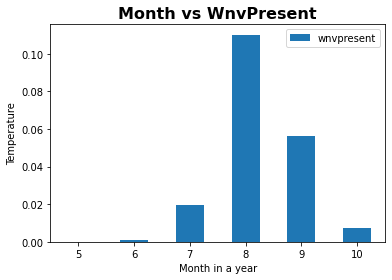

In [603]:
# monthly trend of average temperature
train_merged.groupby('month').mean()[['wnvpresent']].plot.bar()
plt.xlabel('Month in a year')
plt.ylabel('Temperature')
plt.title('Month vs WnvPresent', fontdict={'fontsize': 16, 'weight': 'bold'})
plt.xticks(rotation=0);

In [267]:
train_merged['week'] = train_merged.loc[:,'date'].dt.isocalendar().week

In [828]:
spray.count()

spray['year'] = spray['date'].dt.year
spray['week'] = train_merged.loc[:,'date'].dt.isocalendar().week
spray[spray.year == 2011].week.unique()

<IntegerArray>
[22, 23, 40, 24, 25, 33, 30, 28, 39, 32, 34, 26, 31, 37, 38, 36, 29, 27, 35,
 41]
Length: 20, dtype: UInt32

In [818]:
# define function to print out 

def print_info_sprayed(spray_data, year):

    print_date_sprayed = spray_data.copy()
    print_date_sprayed['week'] = print_date_sprayed.loc[:,'date'].dt.isocalendar().week
    print_date_sprayed['year'] = print_date_sprayed['date'].dt.year
    print_date_sprayed['month'] = print_date_sprayed['date'].dt.month
    data = print_date_sprayed[print_date_sprayed.year == year]

    dates = data.date.value_counts()
    weeks = data.week.unique()
    total_location_sprayed = data[data.year == year].count()[0]

    return print(f'Total of {total_location_sprayed} location sprayed \n\nWithin dates: \n{dates} and \n\nWithin weeks of: {weeks}')


In [800]:
spray.date.value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: date, dtype: int64

In [819]:
print_info_sprayed(spray,2011)

Total of 2209 location sprayed 

Within dates: 
2011-09-07    2114
2011-08-29      95
Name: date, dtype: int64 and 

Within weeks of: <IntegerArray>
[35, 36]
Length: 2, dtype: UInt32


In [743]:
# define function that takes in df and which year to produce trend for num of mosquitos, vs wnvpresent and tavg

def plot_trend_wnv(df, year = [2007, ]):
    dataset = df[df['year']== year]
    # creating separate df to compile SUM of mosquitos by species
    dataset_subsp = dataset[(dataset['species']== 'CULEX PIPIENS') | (dataset['species']== 'CULEX RESTUANS') | (dataset['species']== 'CULEX PIPIENS/RESTUANS')]

    dataset_subsp = dataset_subsp.groupby(['month', 'week','species']).sum()['nummosquitos'].reset_index()
    dataset_subsp[dataset_subsp.species == 'CULEX PIPIENS']

    new_df = dataset_subsp[['month', 'week']]
    new_df['pipiens_num'] = dataset_subsp[dataset_subsp.species == 'CULEX PIPIENS']['nummosquitos']
    new_df['restuans_num'] = dataset_subsp[dataset_subsp.species == 'CULEX RESTUANS']['nummosquitos']
    new_df['mix_pip&restuans_num'] = dataset_subsp[dataset_subsp.species == 'CULEX PIPIENS/RESTUANS']['nummosquitos']

    new_df = new_df.groupby(['week','month']).mean()

    # Plot subsplots with main y-axis = Sum of No. of mosquitos 
    fig, ax1 = plt.subplots() 

    new_df.plot.bar(figsize= (30,10), ax = ax1, stacked = True)

    # set labels for left y-axis 
    plt.ylabel('Sum of No. of mosquitos by Species', fontdict={'size': 20}) 
    plt.xlabel('By Month | Week', fontdict={'size': 20}) 
    plt.xticks(rotation=0, size= 12)
    plt.yticks(size= 12)


    # create df for wnv and tavg line plots 
    analyse_df1 = dataset.groupby(['week','month']).sum()[['wnvpresent']]
    analyse_df2 = dataset.groupby(['week']).mean()[['tavg']].reset_index().drop(columns= ['week'])

    # Adding Twin Axes for wnvpresent (Red solid line )
    ax2 = ax1.twinx()  

    analyse_df1.plot.line(figsize= (30,10), ax = ax2, color = 'red')

    plt.legend(loc='upper left')

    # Adding Twin Axes for tavg (Dark Blue Dotted Line)
    analyse_df2.plot.line(figsize= (30,10), ax = ax2, color = 'darkblue', ls =  '--', lw = 3)
    plt.ylim(0,120)
    plt.legend(loc='upper left')

    # Add label
    plt.ylabel('WnvPresent | Average Temperature') 

    # Show plot
    plt.grid(color = 'black', linestyle = '-.', linewidth = 0.5)
    plt.show()



C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


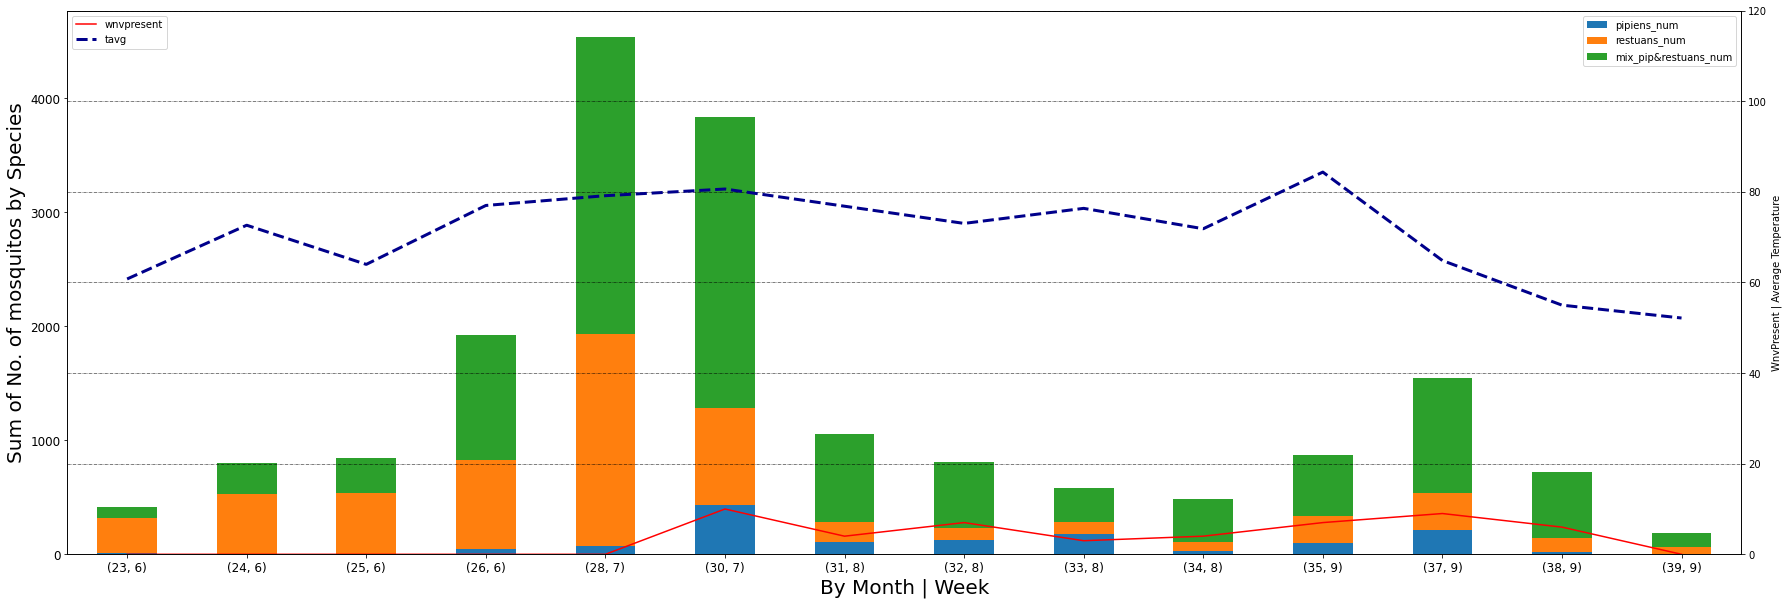

In [794]:
plot_trend_wnv(train_merged,2011)


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


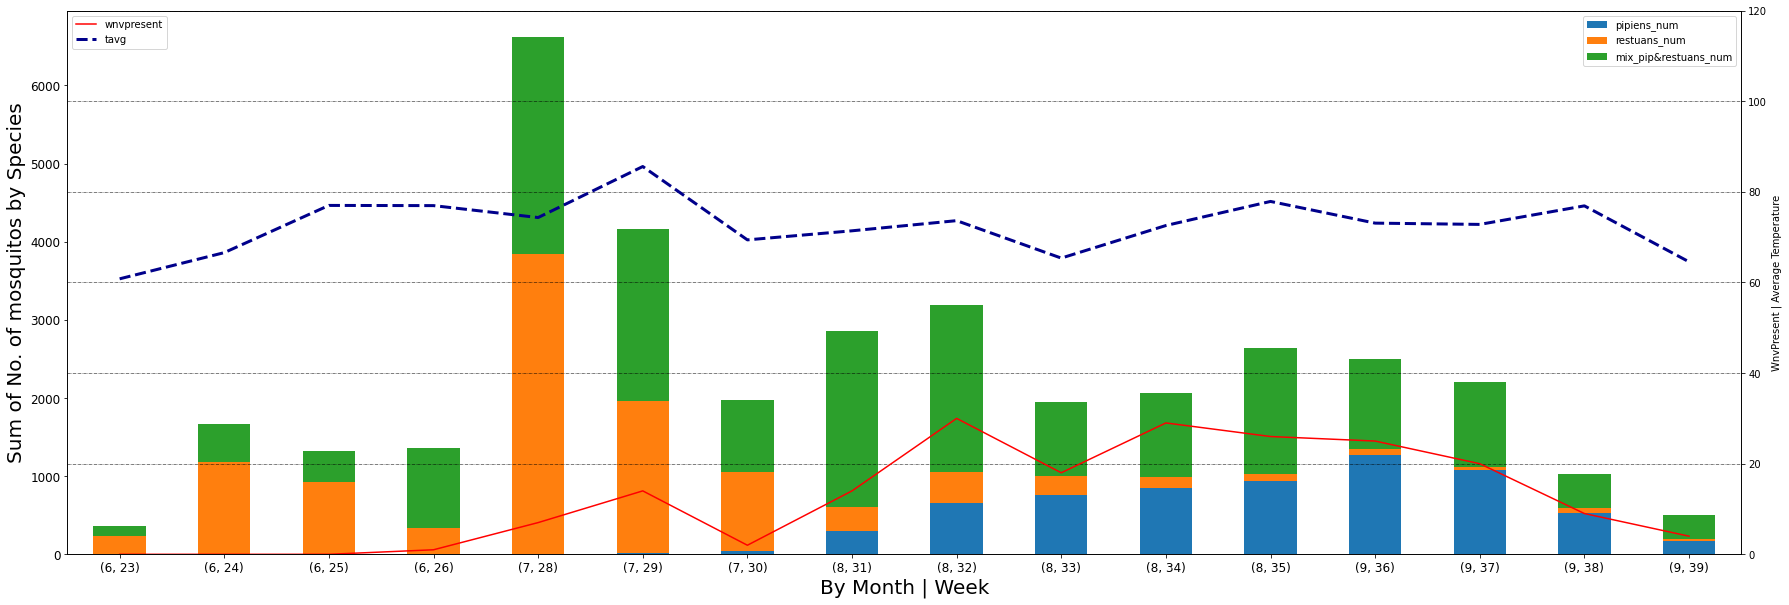

In [699]:
plot_trend_wnv(train_merged,2013)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


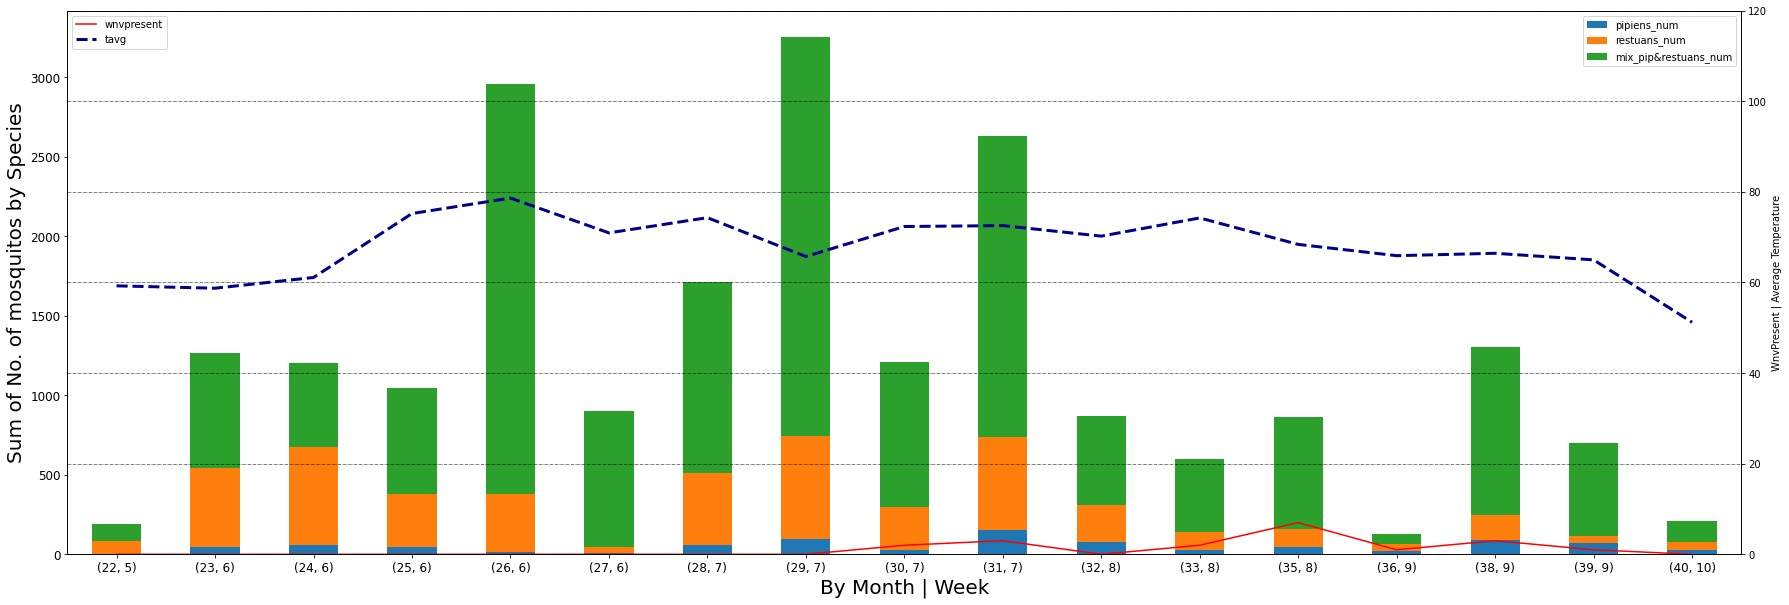

In [756]:
plot_trend_wnv(train_merged,2009)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


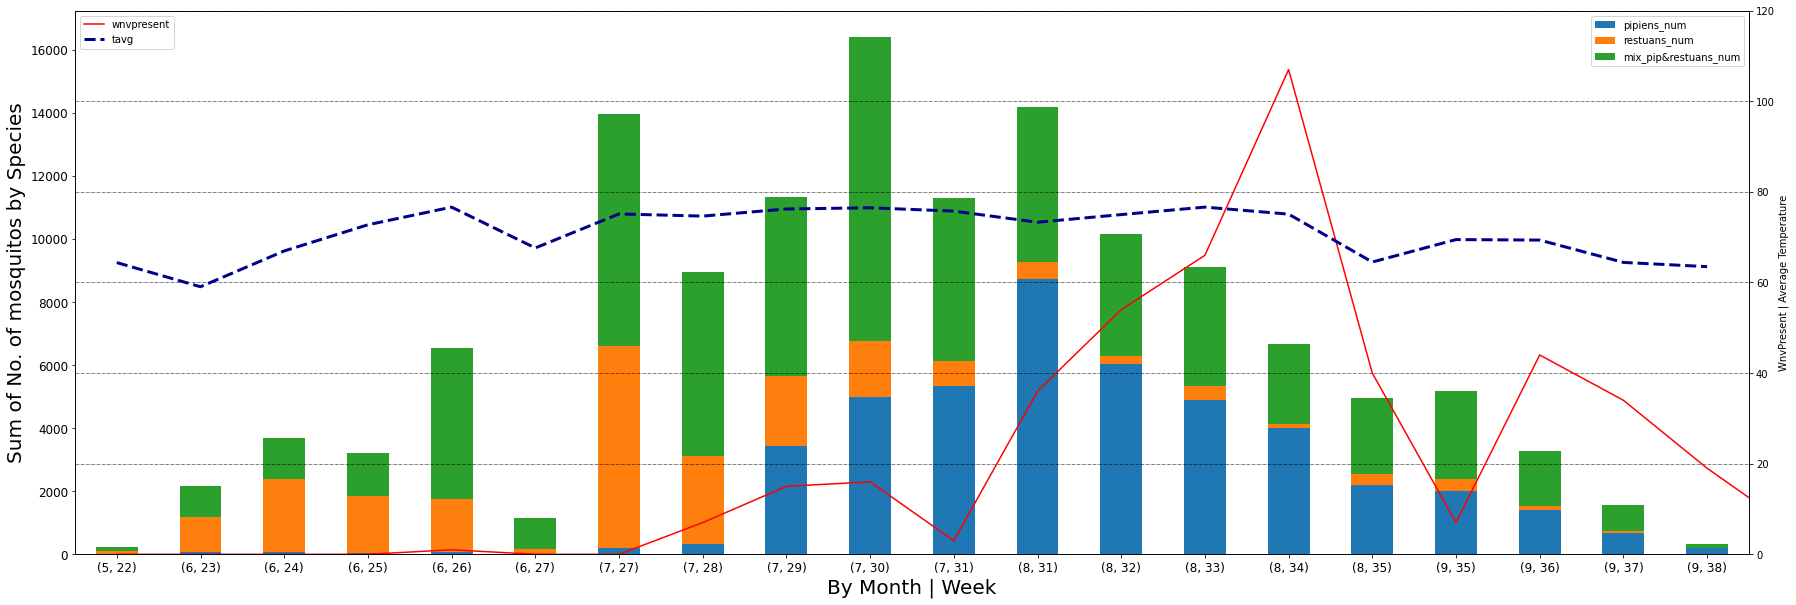

In [688]:
# creating separate df to compile SUM of mosquitos by species
train_merged_subsp = train_merged[(train_merged['species']== 'CULEX PIPIENS') | (train_merged['species']== 'CULEX RESTUANS') | (train_merged['species']== 'CULEX PIPIENS/RESTUANS')]

train_merged_subsp = train_merged_subsp.groupby(['week','species']).sum()['nummosquitos'].reset_index()
train_merged_subsp[train_merged_subsp.species == 'CULEX PIPIENS']

new_df = train_merged_subsp[['week']]
new_df['pipiens_num'] = train_merged_subsp[train_merged_subsp.species == 'CULEX PIPIENS']['nummosquitos']
new_df['restuans_num'] = train_merged_subsp[train_merged_subsp.species == 'CULEX RESTUANS']['nummosquitos']
new_df['mix_pip&restuans_num'] = train_merged_subsp[train_merged_subsp.species == 'CULEX PIPIENS/RESTUANS']['nummosquitos']

new_df = new_df.groupby(['week']).mean()

# Plot subsplots with main y-axis = Sum of No. of mosquitos 
fig, ax1 = plt.subplots() 

new_df.plot.bar(figsize= (30,10), ax = ax1, stacked = True)

# set labels for left y-axis 
plt.ylabel('Sum of No. of mosquitos by Species', fontdict={'size': 20}) 
plt.xlabel('By Month | Week', fontdict={'size': 20}) 
plt.xticks(rotation=0, size= 12)
plt.yticks(size= 12)


# create df for wnv and tavg line plots 
analyse_df1 = train_merged.groupby(['month','week']).sum()[['wnvpresent']]
analyse_df2 = train_merged.groupby(['week']).mean()[['tavg']].reset_index().drop(columns= ['week'])

# Adding Twin Axes for wnvpresent (Red solid line )
ax2 = ax1.twinx()  

analyse_df1.plot.line(figsize= (30,10), ax = ax2, color = 'red')

plt.legend(loc='upper left')

# Adding Twin Axes for tavg (Dark Blue Dotted Line)
analyse_df2.plot.line(figsize= (30,10), ax = ax2, color = 'darkblue', ls =  '--', lw = 3)
plt.ylim(0,120)
plt.legend(loc='upper left')

# Add label
plt.ylabel('WnvPresent | Average Temperature') 

# Show plot
plt.grid(color = 'black', linestyle = '-.', linewidth = 0.5)
plt.show()



In [694]:
train_merged[train_merged.week == 26]['nummosquitos'].sum()

6576.0

In [658]:
train_merged.week.value_counts()

28    821
31    800
34    669
38    606
32    599
33    596
30    567
37    481
29    465
39    422
26    408
35    350
23    343
36    343
25    292
24    283
40    244
27     85
22     81
41     20
Name: week, dtype: Int64

In [615]:
spray.date.dt.week.sort_values().value_counts(normalize = True)

C:\Users\Admin\AppData\Local\Temp/ipykernel_18968/1356865812.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  spray.date.dt.week.sort_values().value_counts(normalize = True)


36    0.204786
33    0.189350
35    0.161577
29    0.148433
30    0.108325
34    0.106977
32    0.080553
Name: date, dtype: float64

We can see increasing trend in temperature over the months, typically highest on August. This can be used as one of our `feature engineered variables`. We will proceed to dummify month variable to these 5 unique months to amplify  

In [203]:
# monthly trend of average temperature
train_merged.groupby('month').mean()[['heat', 'cool']]

,heat,cool
month,,
5,3.679012,3.481481
6,1.809274,6.217651
7,0.067271,10.111641
8,0.003636,10.529091
9,2.221880,7.351823
10,3.268939,3.109848


This should not be in continuous variable analysis as it depicts average cooling or heating component during hot and cold seasons. 
Naturally if we see on August having very high temp, for sure heating will be set at zero and cooling will be set at max. As temperature is believe to be a crucial factor to mosquito activity based ([source](https://blog.mosquito.buzz/how-weather-affects-mosquito-activity)), the higher the temp, the higher the cooling effect needed to dampen the overall temp, displaying positive correlation. It will not make sense to compare with the number of mosquitos as it will sure show positive correlation of cooling effect to num of mosquitos. This high collinearity may have impact on the model results. We can explore both in our models and test based on mse and also view correlation to num of mosquitos.

### Analysis on what correlates to num of mosquitos 

In [204]:
continuous_var = ['tavg','dewpoint','wetbulb','preciptotal','stnpressure','sealevel','resultspeed',
 'resultdir','avgspeed','br','dz','fg','hz','ra','ts','nummosquitos']

In [205]:
impt_features = train_merged[continuous_var]

Checking code sum should only have these based on Daily Table format given by Kaggle 

`TS` - Thunderstorm

`RA` - Rain

`FG` - Fog

`FG+` - Heavy Fog 

`BR` - Mist

`DZ` - Drizzle 

`HZ` - Haze




In [206]:
cont_var = [col for col in merge_df_weather if \
    (merge_df_weather[col].dtypes != 'O') &\
    (col not in ['date','latitude', 'longitude', 'wnvcount', 'station', 'sunrise', 'sunset','heat','cool'])]

heatmap_df = merge_df_weather[cont_var].loc[0:8474]
heatmap_df.drop(columns = ['bcfg', 'fg+','fu','mifg','sn','sq','gr','vcfg'], inplace = True)

<AxesSubplot:>

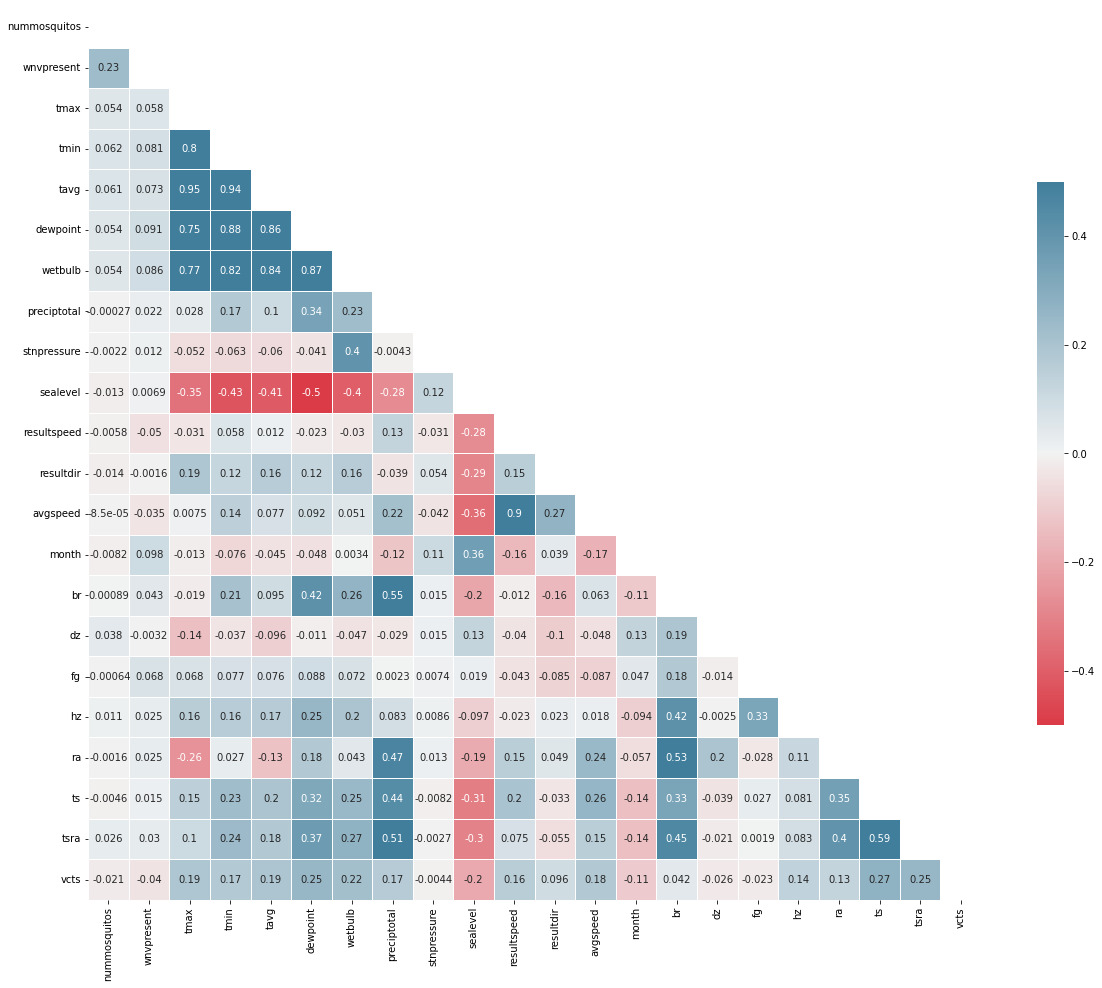

In [207]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(heatmap_df.corr()))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 230, as_cmap=True)

# Draw the heatmap_df with the mask and correct aspect ratio
sns.heatmap(heatmap_df.corr(), mask=mask, cmap=cmap, vmax=0.5, vmin = -0.5,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot = True)

In [208]:
heatmap_df.corr()['nummosquitos'].sort_values(ascending = False)

nummosquitos    1.000000
wnvpresent      0.233532
tmin            0.061706
tavg            0.061015
wetbulb         0.054377
tmax            0.054318
dewpoint        0.053727
dz              0.037772
tsra            0.025728
hz              0.011370
br              0.000892
avgspeed       -0.000085
preciptotal    -0.000272
fg             -0.000644
ra             -0.001602
stnpressure    -0.002224
ts             -0.004564
resultspeed    -0.005794
month          -0.008207
sealevel       -0.012654
resultdir      -0.014070
vcts           -0.021252
Name: nummosquitos, dtype: float64

It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet.

From the heatmap, few observations were observed. 

1) Generally, having `tavg`, `wetbulb`, `thunderstorm`, `drizzle` have a positive correlation with number of mosquitoes while `preciptotal`, `sealevel`, `resultspeed` and `rain` has a slight negative correlation. These features may be usefull in modelling later on. 
2) We can see that `dewpoint` and `wetbulb` is highly correlated to `avg temperature`, suggesting that overall temperature has influence on the two variables. The `higher the dewpoint and temperature`, the `higher the relatively humidity` of the environment. Based on ([source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7068582/)), `humidity` shows `positive correlation` with the `numbers of species sampled from the traps`. 
3) Both `avgspeed and resultspeed` has a negative correlation to the num of mosquitos, indicating that the strong the wind, the lesser the mosquitos. Based on ([source](https://kestrelmeters.com/blogs/news/the-science-of-mosquito-abatement#:~:text=Wind%20works%20as%20a%20natural,MPH%20wind%20gust%20is%20substantial)), strong wind serves as natural repellent as mosquitos cannot fly through strong wind. 
4) The average speed has relative high correlation to weather conditions like `thunderstorm` and `drizzle` suggesting its used to help predict weather patterns and global climate.
5) `Preciptotal` and `rain` seems to have a negative correlation to number of mosquitos, probably due to the skewness of the distribution of precipitation levels. This is unexpected, as usually, it is understood that mosquitos need water to start breeding. However, based on ([source](https://maggiesfarmproducts.com/blogs/bug-help/weather-mosquito-activity#:~:text=Moisture%20plays%20an%20important%20role,to%20an%20increase%20in%20breeding.)), it seems like heavier rain will make it difficult for them to fly. 

WARM FRONTS: Severe weather generally occurs on the warm side of the warm front but is most favorable in the vicinity of the warm front boundary. This is due to the fact that the greatest directional wind shear is located along the warm front boundary ([weather.gov](https://www.weather.gov/source/zhu/ZHU_Training_Page/thunderstorm_stuff/Thunderstorms/thunderstorms.htm))